In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def to_kaggle_csv(matrix, header,filename):
    frame = pd.DataFrame(data = matrix,columns=header)
    frame.to_csv(path_or_buf  = filename,index = False,sep =',')
    return frame

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
def load_train_valid_test_data(train_file,test_file,validation_percentage):
    train_data = np.genfromtxt(delimiter=',',fname=train_file,skip_header=True)
    test_data = np.genfromtxt(delimiter=',',fname=test_file,skip_header=True)
    train_y = train_data[:,0]
    train_x = train_data[:,1:]
    enc = preprocessing.OneHotEncoder()
    enc.fit(train_y.reshape((train_y.shape[0],1)))
    train_y = enc.transform(train_y.reshape((train_y.shape[0],1))).toarray()
    train_x /= 255
    test_x  = test_data/255
    train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
    
    return train_x, valid_x, test_x, train_y, valid_y

def validate_preprocessing(train_x, valid_x, test_x, train_y, valid_y):
    print('max train',train_x.max())
    print('max valid',train_x.max())
    print('max test',train_x.max())
    
    print('train_x shape',train_x.shape)
    print('valid_x shape',valid_x.shape)
    print('test_x shape',test_x.shape)
    print('train_y shape',train_y.shape)
    print('valid_y shape',valid_y.shape)

In [3]:
train_x, valid_x, test_x, train_y, valid_y = load_train_valid_test_data('train.csv','test.csv',0.2)

In [4]:
validate_preprocessing(train_x, valid_x, test_x, train_y, valid_y)

max train 1.0
max valid 1.0
max test 1.0
train_x shape (33600, 784)
valid_x shape (8400, 784)
test_x shape (28000, 784)
train_y shape (33600, 10)
valid_y shape (8400, 10)


## Training multilayer network for mnist dataset
multilayer networks have the capacity to learn features of the input and build upon it in subsequent layers, so it can overfit to the training data, we'll need to make sure it doesn't, that's why we'll be monitoring the training process through both validation and training accuracies.

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras import optimizers
from keras import regularizers
from keras.layers.core import Dense, Activation # defining the layers
from keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from keras import backend as K

In [6]:
def MLP_model(optimizer,epochs,train_x,train_y,layers_width,regularization = 0,valid_x = None,valid_y = None, activation = 'relu'):
    mlp_model = Sequential()    
    for i in range(len(layers_width)):
        if i == 0:
            mlp_model.add(Dense(layers_width[i],input_shape=(784,),kernel_regularizer=regularizers.l2(regularization)))
        else:
            mlp_model.add(Dense(layers_width[i],kernel_regularizer=regularizers.l2(regularization)))
        if i != len(layers_width)-1:
            mlp_model.add(Activation(activation))
    mlp_model.add(Activation('softmax'))
    
    
    mlp_model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,#RMSprop()
                  metrics=['accuracy'])
    history = mlp_model.fit(train_x,train_y,
                        batch_size = 64,epochs=epochs,
                        verbose=1,validation_data=(valid_x, valid_y))#,validation_data=(test, Y_test))
    return mlp_model,history

In [9]:
regs = [0.001,0.0005,0.0001,0]
network_size = [256,256,10]
models = []
histories = []
for reg in regs:
    for optimizer in ['adam']:
        #print('optimizer',optimzer)
        print('reg', reg)
        model,history = MLP_model(optimizer,20, train_x, train_y, network_size,reg ,valid_x, valid_y)
        models.append(model)
        histories.append(history)

reg 0.001
Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 7s 195us/step - loss: 0.6548 - acc: 0.9107 - val_loss: 0.4253 - val_acc: 0.9513
Epoch 2/20
33600/33600 [==============================] - 6s 168us/step - loss: 0.3619 - acc: 0.9567 - val_loss: 0.3522 - val_acc: 0.9492
Epoch 3/20
33600/33600 [==============================] - 6s 169us/step - loss: 0.2924 - acc: 0.9651 - val_loss: 0.3038 - val_acc: 0.9550
Epoch 4/20
33600/33600 [==============================] - 6s 168us/step - loss: 0.2601 - acc: 0.9687 - val_loss: 0.2722 - val_acc: 0.9642
Epoch 5/20
33600/33600 [==============================] - 6s 170us/step - loss: 0.2465 - acc: 0.9703 - val_loss: 0.2634 - val_acc: 0.9642
Epoch 6/20
33600/33600 [==============================] - 6s 169us/step - loss: 0.2351 - acc: 0.9742 - val_loss: 0.2524 - val_acc: 0.9649
Epoch 7/20
33600/33600 [==============================] - 6s 167us/step - loss: 0.2325 - acc: 0.9748 - val_loss: 

Epoch 19/20
33600/33600 [==============================] - 6s 173us/step - loss: 0.0691 - acc: 0.9929 - val_loss: 0.1324 - val_acc: 0.9752
Epoch 20/20
33600/33600 [==============================] - 6s 175us/step - loss: 0.0646 - acc: 0.9950 - val_loss: 0.1334 - val_acc: 0.9743
reg 0
Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 6s 181us/step - loss: 0.2795 - acc: 0.9199 - val_loss: 0.1582 - val_acc: 0.9512
Epoch 2/20
33600/33600 [==============================] - 5s 153us/step - loss: 0.1090 - acc: 0.9670 - val_loss: 0.1199 - val_acc: 0.9618
Epoch 3/20
33600/33600 [==============================] - 5s 153us/step - loss: 0.0688 - acc: 0.9793 - val_loss: 0.1058 - val_acc: 0.9671
Epoch 4/20
33600/33600 [==============================] - 5s 152us/step - loss: 0.0505 - acc: 0.9837 - val_loss: 0.1081 - val_acc: 0.9661
Epoch 5/20
33600/33600 [==============================] - 5s 155us/step - loss: 0.0330 - acc: 0.9901 - val_loss: 0.

In [16]:
val_acc_list = []
for history in histories:
    val_acc_list.append(history.history['acc'])
val_acc_np = np.array(val_acc_list)
arg = np.argmax(val_acc_np,axis = 0)[-1]
print (arg,val_acc_np[3,-1])
models[3].summary()

3 0.99625
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_46 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_47 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_48 (Activation)   (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
____________________________________________________________

In [17]:
generate_submission(models[3],test_x,'sub_rmsprop_mlp_265_265_10_reg0_val975_train996.csv',['ImageId','Label'])

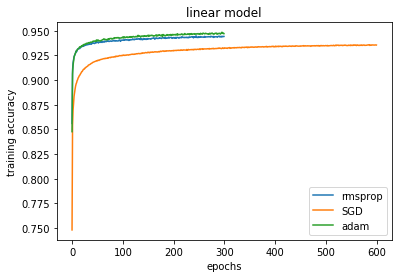

0.94419047619 0.946976190476


In [137]:
plt.figure()
hist1 = rmsprop_history.history['acc']
hist2 = sgd_history.history['acc']
hist3 = adam_history.history['acc']
plt.title('linear model')
plt.xlabel('epochs')
plt.ylabel('training accuracy')
plt.plot(hist1,label='rmsprop')
plt.plot(hist2,label='SGD')
plt.plot(hist3,label='adam')
plt.legend()
plt.show()
print(hist1[-1],hist3[-1])

In [12]:
def generate_submission(model,data,filename,file_columns = None):
    predictions = model.predict(test_x)
    result = predictions.argmax(axis =1 )
    result = result.reshape((28000,1))
    ids = (np.arange(28000)+1).reshape((28000,1))
    result = np.hstack((ids,result))
    m = to_kaggle_csv(result,file_columns, filename)

In [139]:
predictions.shape
result = predictions.argmax(axis =1 )
result.shape
result = result.reshape((28000,1))
ids = (np.arange(28000)+1).reshape((28000,1))
result = np.hstack((ids,result))
print(result[:4,:],result.shape)
m = to_kaggle_csv(result,['ImageId','Label'],'submission_adam_model_300ep_no_regularization.csv')
print(m.head())
#plt.imshow(test_x[3,:].reshape((28,28)))
#plt.show()

[1 2 3 4]
[[1 2]
 [2 0]
 [3 9]
 [4 7]] (28000, 2)
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      7
4        5      3


### Summary for the linear model
####  The output of the linear model
the submission got the 1653th place out of 1879, this is the top 87.9% with accuracy of 91.6%, which is really bad for mnist dataset, as it's the easiest task you'll ever workon and it's far below our human level accuracy.
Note that training accuracy is around 94.4% and the submission accuracy is around 91.6%.
We've been training for around 270 epochs
<img src="1-linearmodel.PNG" height="300" width = "800" >

## Linear models with regularization

now the model is overfitting --> training acc is 94.4 and submission accuracy is 91.6.
Next step is to add regularization and reduce overfitting --> thus we need a separate validation set to monitor overfitting.
We'll find that a linear model isn't capable of overfitting and any further regularization will only reduce the training error, as the model doesn't have the capacity to overfit

That's why it's a best practice in neural networks to overfit the data first to make sure that your model is good, then add regularization to generalize better, but you shouldn't spend anytime trying to prevent overfitting using a model with high bias (simple models).

In [151]:
from sklearn.model_selection import train_test_split
## validation set
y = train_data[:,0]
X = train_data[:,1:]
enc = preprocessing.OneHotEncoder()
enc.fit(y.reshape((y.shape[0],1)))
train_y = enc.transform(y.reshape((y.shape[0],1))).toarray()

train_x, valid_x, train_y, valid_y = train_test_split(X, train_y, test_size=0.2, random_state=42)

In [165]:
regs = [0.1,0.01,0.001,0.0001,0]
models = []
optimizer = 'rmsprop'
histories = []
for reg in regs:
    model,history = linear_model(optimizer,150, train_x,train_y,regularization=reg,valid_x=valid_x,valid_y=valid_y)
    models.append(model)
    histories.append(history)

Train on 33600 samples, validate on 8400 samples
Epoch 1/150
33600/33600 [==============================] - 4s 107us/step - loss: 1.5293 - acc: 0.8036 - val_loss: 1.3471 - val_acc: 0.8408
Epoch 2/150
33600/33600 [==============================] - 3s 86us/step - loss: 1.3466 - acc: 0.8391 - val_loss: 1.3412 - val_acc: 0.8390
Epoch 3/150
33600/33600 [==============================] - 3s 86us/step - loss: 1.3423 - acc: 0.8398 - val_loss: 1.3424 - val_acc: 0.8383
Epoch 4/150
33600/33600 [==============================] - 3s 87us/step - loss: 1.3394 - acc: 0.8385 - val_loss: 1.3337 - val_acc: 0.8396
Epoch 5/150
33600/33600 [==============================] - 3s 87us/step - loss: 1.3376 - acc: 0.8388 - val_loss: 1.3358 - val_acc: 0.8371
Epoch 6/150
33600/33600 [==============================] - 3s 87us/step - loss: 1.3364 - acc: 0.8385 - val_loss: 1.3352 - val_acc: 0.8418
Epoch 7/150
33600/33600 [==============================] - 3s 87us/step - loss: 1.3351 - acc: 0.8392 - val_loss: 1.3383 - 

Epoch 118/150
33600/33600 [==============================] - 3s 89us/step - loss: 1.3326 - acc: 0.8363 - val_loss: 1.3314 - val_acc: 0.8404
Epoch 119/150
33600/33600 [==============================] - 3s 90us/step - loss: 1.3337 - acc: 0.8361 - val_loss: 1.3327 - val_acc: 0.8371
Epoch 120/150
33600/33600 [==============================] - 3s 92us/step - loss: 1.3330 - acc: 0.8361 - val_loss: 1.3306 - val_acc: 0.8437
Epoch 121/150
33600/33600 [==============================] - 3s 90us/step - loss: 1.3332 - acc: 0.8365 - val_loss: 1.3299 - val_acc: 0.8361
Epoch 122/150
33600/33600 [==============================] - 3s 87us/step - loss: 1.3330 - acc: 0.8366 - val_loss: 1.3323 - val_acc: 0.8321
Epoch 123/150
33600/33600 [==============================] - 3s 85us/step - loss: 1.3333 - acc: 0.8381 - val_loss: 1.3316 - val_acc: 0.8438
Epoch 124/150
33600/33600 [==============================] - 3s 87us/step - loss: 1.3329 - acc: 0.8381 - val_loss: 1.3328 - val_acc: 0.8383
Epoch 125/150
33600/

33600/33600 [==============================] - 3s 86us/step - loss: 0.6653 - acc: 0.8905 - val_loss: 0.6684 - val_acc: 0.8850
Epoch 86/150
33600/33600 [==============================] - 3s 84us/step - loss: 0.6654 - acc: 0.8897 - val_loss: 0.6715 - val_acc: 0.8860
Epoch 87/150
33600/33600 [==============================] - 3s 87us/step - loss: 0.6656 - acc: 0.8898 - val_loss: 0.6701 - val_acc: 0.8871
Epoch 88/150
33600/33600 [==============================] - 3s 84us/step - loss: 0.6652 - acc: 0.8899 - val_loss: 0.6712 - val_acc: 0.8862
Epoch 89/150
33600/33600 [==============================] - 3s 84us/step - loss: 0.6653 - acc: 0.8900 - val_loss: 0.6729 - val_acc: 0.8867
Epoch 90/150
33600/33600 [==============================] - 3s 85us/step - loss: 0.6653 - acc: 0.8908 - val_loss: 0.6699 - val_acc: 0.8874
Epoch 91/150
33600/33600 [==============================] - 3s 83us/step - loss: 0.6655 - acc: 0.8901 - val_loss: 0.6718 - val_acc: 0.8862
Epoch 92/150
33600/33600 [==============

Epoch 144/150
33600/33600 [==============================] - 3s 87us/step - loss: 0.6656 - acc: 0.8895 - val_loss: 0.6725 - val_acc: 0.8817
Epoch 145/150
33600/33600 [==============================] - 3s 89us/step - loss: 0.6657 - acc: 0.8900 - val_loss: 0.6707 - val_acc: 0.8831
Epoch 146/150
33600/33600 [==============================] - 3s 88us/step - loss: 0.6653 - acc: 0.8900 - val_loss: 0.6692 - val_acc: 0.8885
Epoch 147/150
33600/33600 [==============================] - 3s 91us/step - loss: 0.6654 - acc: 0.8901 - val_loss: 0.6709 - val_acc: 0.8880
Epoch 148/150
33600/33600 [==============================] - 3s 89us/step - loss: 0.6648 - acc: 0.8896 - val_loss: 0.6720 - val_acc: 0.8875
Epoch 149/150
33600/33600 [==============================] - 3s 86us/step - loss: 0.6652 - acc: 0.8896 - val_loss: 0.6730 - val_acc: 0.8875
Epoch 150/150
33600/33600 [==============================] - 3s 87us/step - loss: 0.6658 - acc: 0.8893 - val_loss: 0.6698 - val_acc: 0.8875
Train on 33600 sampl

Epoch 111/150
33600/33600 [==============================] - 3s 88us/step - loss: 0.3869 - acc: 0.9161 - val_loss: 0.4075 - val_acc: 0.9065
Epoch 112/150
33600/33600 [==============================] - 3s 85us/step - loss: 0.3869 - acc: 0.9160 - val_loss: 0.4049 - val_acc: 0.9107
Epoch 113/150
33600/33600 [==============================] - 3s 86us/step - loss: 0.3865 - acc: 0.9167 - val_loss: 0.4045 - val_acc: 0.9119
Epoch 114/150
33600/33600 [==============================] - 3s 87us/step - loss: 0.3868 - acc: 0.9164 - val_loss: 0.4080 - val_acc: 0.9065
Epoch 115/150
33600/33600 [==============================] - 3s 87us/step - loss: 0.3869 - acc: 0.9153 - val_loss: 0.4049 - val_acc: 0.9101
Epoch 116/150
33600/33600 [==============================] - 3s 85us/step - loss: 0.3870 - acc: 0.9160 - val_loss: 0.4074 - val_acc: 0.9088
Epoch 117/150
33600/33600 [==============================] - 3s 84us/step - loss: 0.3869 - acc: 0.9162 - val_loss: 0.4047 - val_acc: 0.9095
Epoch 118/150
33600/

33600/33600 [==============================] - 3s 88us/step - loss: 0.3126 - acc: 0.9303 - val_loss: 0.3558 - val_acc: 0.9175
Epoch 79/150
33600/33600 [==============================] - 3s 83us/step - loss: 0.3128 - acc: 0.9300 - val_loss: 0.3572 - val_acc: 0.9190
Epoch 80/150
33600/33600 [==============================] - 3s 84us/step - loss: 0.3128 - acc: 0.9308 - val_loss: 0.3567 - val_acc: 0.9180
Epoch 81/150
33600/33600 [==============================] - 3s 85us/step - loss: 0.3130 - acc: 0.9305 - val_loss: 0.3562 - val_acc: 0.9185
Epoch 82/150
33600/33600 [==============================] - 3s 84us/step - loss: 0.3134 - acc: 0.9306 - val_loss: 0.3568 - val_acc: 0.9175
Epoch 83/150
33600/33600 [==============================] - 3s 84us/step - loss: 0.3140 - acc: 0.9305 - val_loss: 0.3573 - val_acc: 0.9194
Epoch 84/150
33600/33600 [==============================] - 3s 83us/step - loss: 0.3137 - acc: 0.9310 - val_loss: 0.3602 - val_acc: 0.9173
Epoch 85/150
33600/33600 [==============

Epoch 137/150
33600/33600 [==============================] - 3s 87us/step - loss: 0.3262 - acc: 0.9307 - val_loss: 0.3689 - val_acc: 0.9186
Epoch 138/150
33600/33600 [==============================] - 3s 90us/step - loss: 0.3258 - acc: 0.9304 - val_loss: 0.3692 - val_acc: 0.9194
Epoch 139/150
33600/33600 [==============================] - 3s 94us/step - loss: 0.3265 - acc: 0.9310 - val_loss: 0.3690 - val_acc: 0.9182
Epoch 140/150
33600/33600 [==============================] - 3s 99us/step - loss: 0.3266 - acc: 0.9309 - val_loss: 0.3719 - val_acc: 0.9174
Epoch 141/150
33600/33600 [==============================] - 3s 99us/step - loss: 0.3269 - acc: 0.9307 - val_loss: 0.3718 - val_acc: 0.9175
Epoch 142/150
33600/33600 [==============================] - 3s 91us/step - loss: 0.3263 - acc: 0.9318 - val_loss: 0.3712 - val_acc: 0.9175
Epoch 143/150
33600/33600 [==============================] - 3s 87us/step - loss: 0.3272 - acc: 0.9309 - val_loss: 0.3708 - val_acc: 0.9187
Epoch 144/150
33600/

33600/33600 [==============================] - 3s 85us/step - loss: 0.2276 - acc: 0.9424 - val_loss: 0.3251 - val_acc: 0.9198
Epoch 105/150
33600/33600 [==============================] - 3s 85us/step - loss: 0.2275 - acc: 0.9429 - val_loss: 0.3244 - val_acc: 0.9199
Epoch 106/150
33600/33600 [==============================] - 3s 84us/step - loss: 0.2270 - acc: 0.9424 - val_loss: 0.3254 - val_acc: 0.9215
Epoch 107/150
33600/33600 [==============================] - 3s 87us/step - loss: 0.2270 - acc: 0.9422 - val_loss: 0.3254 - val_acc: 0.9199
Epoch 108/150
33600/33600 [==============================] - 3s 86us/step - loss: 0.2270 - acc: 0.9436 - val_loss: 0.3269 - val_acc: 0.9201
Epoch 109/150
33600/33600 [==============================] - 3s 84us/step - loss: 0.2272 - acc: 0.9428 - val_loss: 0.3254 - val_acc: 0.9199
Epoch 110/150
33600/33600 [==============================] - 3s 84us/step - loss: 0.2267 - acc: 0.9432 - val_loss: 0.3272 - val_acc: 0.9212
Epoch 111/150
33600/33600 [=======

In [169]:
print('regularizaiton','training acc','validation acc')
for idx, histor in enumerate(histories):
    tr_acc    = histor.history['acc'][-1]
    valid_acc = histor.history['val_acc'][-1]
    print(regs[idx],tr_acc,valid_acc)




regularizaiton training acc validation acc
0.1 0.837738095238 0.837023809524
0.01 0.889285714286 0.8875
0.001 0.915654761905 0.909404761905
0.0001 0.930863095238 0.919523809524
0 0.944761904762 0.919523809524


In [168]:
## the best model is the one with 0.0001 reg
model = models[-1]
generate_submission(model,test_data,'sub_rmsprop_reg0_150ep_94.4tr_91.9valid.csv',['ImageId','Label'])

| Regularization  | Training acc  | Validation acc  |
| -------------   |:-------------:| ---------------:|
| 0.1             | 83.9          |    83.24        |
| 0.01            | 8899          |    8852         |
| 0.001           | 9159          |    9114         |